In [1]:
import pandas
import datetime
%pylab inline
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


In [2]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','smart_location','number_of_reviews'])
ab_df['any_reviews']  = ab_df['number_of_reviews'].apply(lambda x: int(x!=0))
ab_df_reviewful = ab_df[ab_df['any_reviews'] == 1]
hosts = ab_df.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})
hosts_refver = ab_df_reviewful.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})

In [3]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv',usecols=['people_id','member_since','city','state','status','verified_status','references_int'])

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)
cs_df_defhosts = cs_df[cs_df['status'] == 'Accepting Guests']
cs_df_defhosts['any_verification'] = cs_df_defhosts['verified_status'].apply(lambda x: int(x != 'Not Verified'))
cs_df_defhosts['any_references'] = cs_df_defhosts['references_int'].apply(lambda x: int(x != 0))
cs_df_defhosts['any_ref_ver'] = cs_df_defhosts[['any_references','any_verification']].apply(lambda row: row[0] or row[1], axis=1)
cs_df_defhosts_refver = cs_df_defhosts[cs_df_defhosts['any_ref_ver'] == 1]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [4]:
unique(cs_df['status'].values)

array(['Accepting Guests', 'Maybe Accepting Guests',
       'Not Accepting Guests', 'Wants to Meet Up'], dtype=object)

In [5]:
hosts['host_since'] = hosts['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
hosts_refver['host_since'] = hosts_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)

In [6]:
ab_since_global = hosts.groupby(by='host_since').agg(len)
ab_since_global_refver = hosts_refver.groupby(by='host_since').agg(len)

In [7]:
ab_daily_roll = pandas.rolling_mean(ab_since_global, window=10)

(array([ 733408.,  733773.,  734138.,  734503.,  734869.,  735234.,
         735599.,  735964.]), <a list of 8 Text xticklabel objects>)

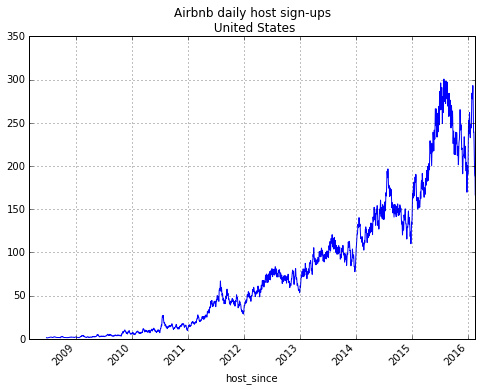

In [8]:
ax = ab_daily_roll.plot(legend=False, title='Airbnb daily host sign-ups \n United States', figsize=(8,6))
plt.xticks(rotation=45)

In [9]:
cs_since_global = cs_df.groupby(by='member_since').count()
cs_since_global_defhosts = cs_df_defhosts.groupby(by='member_since').count()
cs_since_global_defhosts_refver = cs_df_defhosts_refver.groupby(by='member_since').count()

In [10]:
cs_since_global

,city,people_id,state,status,verified_status,references_int
member_since,,,,,,
2003-01-01,53,53,53,53,53,53
2004-01-01,1396,1398,1398,1398,1398,1398
2005-01-01,6854,6856,6856,6856,6856,6856
2006-01-01,10307,10321,10321,10321,10321,10321
2007-01-01,23286,23307,23307,23307,23307,23307
2008-01-01,39086,39110,39110,39110,39110,39110
2009-01-01,47375,47427,47427,47427,47427,47427
2010-01-01,47326,47385,47385,47385,47385,47385
2011-01-01,36424,36491,36491,36491,36491,36491


In [11]:
cs_since_global_defhosts

,city,people_id,state,status,verified_status,references_int,any_verification,any_references,any_ref_ver
member_since,,,,,,,,,
2003-01-01,31,31,31,31,31,31,31,31,31
2004-01-01,867,868,868,868,868,868,868,868,868
2005-01-01,3835,3837,3837,3837,3837,3837,3837,3837,3837
2006-01-01,6038,6046,6046,6046,6046,6046,6046,6046,6046
2007-01-01,13958,13967,13967,13967,13967,13967,13967,13967,13967
2008-01-01,23593,23604,23604,23604,23604,23604,23604,23604,23604
2009-01-01,28885,28905,28905,28905,28905,28905,28905,28905,28905
2010-01-01,29183,29206,29206,29206,29206,29206,29206,29206,29206
2011-01-01,20815,20840,20840,20840,20840,20840,20840,20840,20840


In [12]:
cs_since_global_defhosts_refver

,city,people_id,state,status,verified_status,references_int,any_verification,any_references,any_ref_ver
member_since,,,,,,,,,
2003-01-01,10,10,10,10,10,10,10,10,10
2004-01-01,142,142,142,142,142,142,142,142,142
2005-01-01,681,682,682,682,682,682,682,682,682
2006-01-01,1619,1626,1626,1626,1626,1626,1626,1626,1626
2007-01-01,4124,4131,4131,4131,4131,4131,4131,4131,4131
2008-01-01,6669,6679,6679,6679,6679,6679,6679,6679,6679
2009-01-01,7630,7646,7646,7646,7646,7646,7646,7646,7646
2010-01-01,7872,7887,7887,7887,7887,7887,7887,7887,7887
2011-01-01,6777,6796,6796,6796,6796,6796,6796,6796,6796


# Average 2013

In [13]:
cs_since_global_2013mean = cs_since_global_defhosts.copy()

In [14]:
cs_since_global_2013mean.ix['2013-01-01'] = (cs_since_global_2013mean.ix['2012-01-01'] + cs_since_global_2013mean.ix['2014-01-01']) / 2

In [15]:
cs_year_roll = pandas.rolling_mean(cs_since_global['people_id'], window=2)
cs_year_roll_defhosts = pandas.rolling_mean(cs_since_global_defhosts['people_id'], window=2)



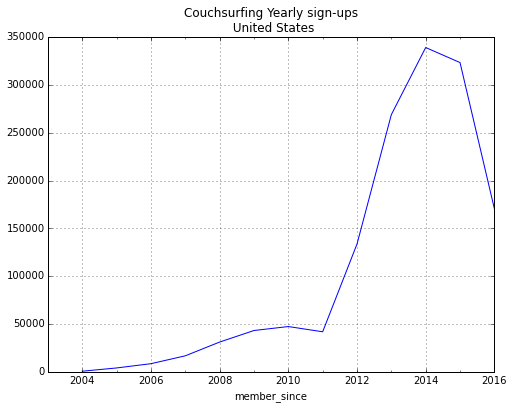

In [16]:
cs_year_roll.plot(title="Couchsurfing Yearly sign-ups\n United States", figsize=(8,6))

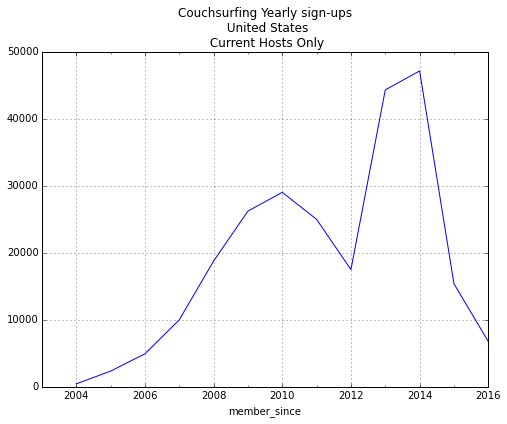

In [17]:
cs_year_roll_defhosts.plot(title="Couchsurfing Yearly sign-ups\n United States\n Current Hosts Only", figsize=(8,6))

In [18]:
ab_since_year = ab_since_global.groupby(by=lambda x: x.year).agg(sum)
ab_since_year_refver = ab_since_global_refver.groupby(by=lambda x: x.year).agg(sum)
cs_since_year = pandas.DataFrame(cs_since_global.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts = pandas.DataFrame(cs_since_global_defhosts.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_2013mean = pandas.DataFrame(cs_since_global_2013mean.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts_refver = pandas.DataFrame(cs_since_global_defhosts_refver.groupby(by=lambda x: x.year).agg(sum)['people_id'])

In [19]:
ab_since_year.columns = ['signups']
ab_since_year_refver.columns = ['signups']
cs_since_year.columns = ['signups']
cs_since_year_defhosts.columns = ['signups']
cs_since_year_2013mean.columns = ['signups']
cs_since_year_defhosts_refver.columns = ['signups']

In [20]:
abcs = ab_since_year.join(cs_since_year,how='outer',lsuffix='_ab', rsuffix='_cs')
abcs_all= abcs.join(cs_since_year_defhosts, rsuffix='_cs_definitehosts')
abcs_defhost = ab_since_year.join(cs_since_year_defhosts,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts')
abcs_2013mean = ab_since_year.join(cs_since_year_2013mean,how='outer',lsuffix="_ab", rsuffix='_cs_2013mean')
abcs_defhost_refver = ab_since_year.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')
abcs_both_refver = ab_since_year_refver.join(cs_since_year_defhosts_refver,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts_refver')

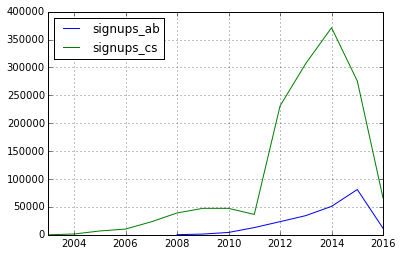

In [21]:
abcs.plot()

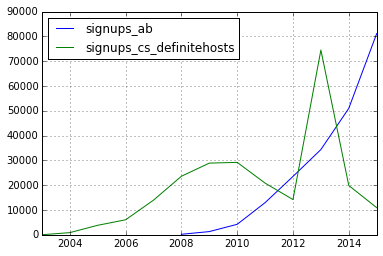

In [22]:
abcs_defhost.ix[:2015].plot()

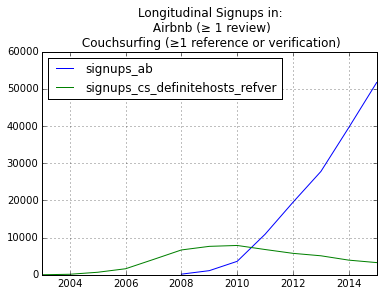

In [23]:
abcs_both_refver.ix[:2015].plot(title='Longitudinal Signups in:\n Airbnb (≥ 1 review)\n Couchsurfing (≥1 reference or verification)')

In [193]:
abcs_r = abcs_both_refver.reset_index()

In [195]:
%Rpush abcs_r

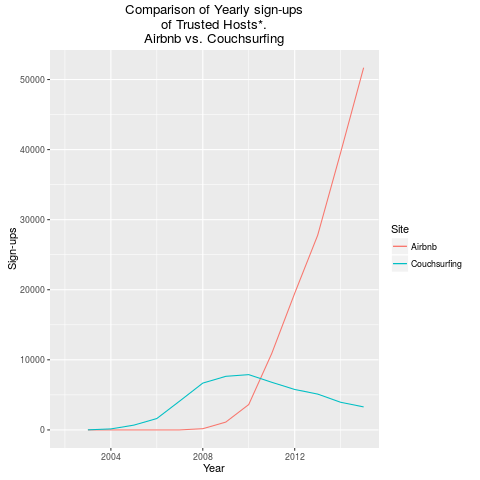

In [213]:
%%R

p = ggplot(abcs_r, aes(index)) + 
        geom_line(aes(y=signups_ab, colour="signups_ab")) + 
        geom_line(aes(y=signups_cs_definitehosts_refver, colour="signups_cs_definitehosts_refver"))+
        xlim(2002,2015)+
        xlab("Year")+
        ylab("Sign-ups")+
        ggtitle("Comparison of Yearly sign-ups\n of Trusted Hosts*. \nAirbnb vs. Couchsurfing")+
        scale_colour_discrete(name="Site",
                         labels=c("Airbnb", "Couchsurfing"))
print(p)
                

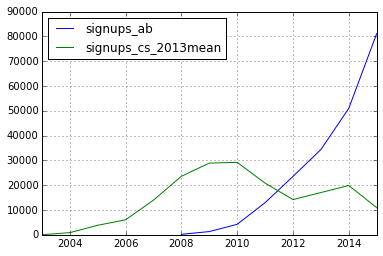

In [24]:
abcs_2013mean.ix[:2015].plot()

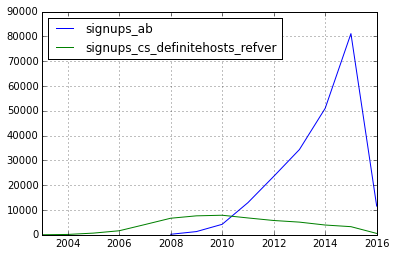

In [25]:
abcs_defhost_refver.plot()

In [26]:
abcs_both_refver.fillna(0, inplace=True)

signups - defintiely host, signups_cs - includes maybe accepting. No 2013 adjustment

In [27]:
abcs_all.corr()

,signups_ab,signups_cs,signups
signups_ab,1.000000,0.814058,-0.053600
signups_cs,0.814058,1.000000,0.478641
signups,-0.053600,0.478641,1.000000


In [28]:
abcs_2013mean.ix[2008:2015].corr()

,signups_ab,signups_cs_2013mean
signups_ab,1.000000,-0.797019
signups_cs_2013mean,-0.797019,1.000000


In [29]:
abcs_defhost_refver.ix[2008:2015].corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,-0.950764
signups_cs_definitehosts_refver,-0.950764,1.000000


In [30]:
abcs_both_refver.corr()

,signups_ab,signups_cs_definitehosts_refver
signups_ab,1.000000,0.134996
signups_cs_definitehosts_refver,0.134996,1.000000


In [31]:
abcs_both_refver.ix[2008:2015]

,signups_ab,signups_cs_definitehosts_refver
2008,173,6679
2009,1114,7646
2010,3621,7887
2011,10898,6796
2012,19499,5769
2013,27776,5111
2014,39586,3942
2015,51692,3281


BY CITY
========

In [32]:
state_dict = dict( (('Alabama', 'AL'),
       ('Alaska', 'AK'),
       ('Arizona', 'AZ'),
       ('Arkansas', 'AR'),
       ('California', 'CA'),
       ('Colorado', 'CO'),
       ('Connecticut', 'CT'),
       ('Delaware', 'DE'),
       ('District of Columbia', 'DC'),
       ('Florida', 'FL'),
       ('Georgia', 'GA'),
       ('Hawaii', 'HI'),
       ('Idaho', 'ID'),
       ('Illinois', 'IL'),
       ('Indiana', 'IN'),
       ('Iowa', 'IA'),
       ('Kansas', 'KS'),
       ('Kentucky', 'KY'),
       ('Louisiana', 'LA'),
       ('Maine', 'ME'),
       ('Maryland', 'MD'),
       ('Massachusetts', 'MA'),
       ('Michigan', 'MI'),
       ('Minnesota', 'MN'),
       ('Mississippi', 'MS'),
       ('Missouri', 'MO'),
       ('Montana', 'MT'),
       ('Nebraska', 'NE'),
       ('Nevada', 'NV'),
       ('New Hampshire', 'NH'),
       ('New Jersey', 'NJ'),
       ('New Mexico', 'NM'),
       ('New York', 'NY'),
       ('North Carolina', 'NC'),
       ('North Dakota', 'ND'),
       ('Ohio', 'OH'),
       ('Oklahoma', 'OK'),
       ('Oregon', 'OR'),
       ('Pennsylvania', 'PA'),
       ('Rhode Island', 'RI'),
       ('South Carolina', 'SC'),
       ('South Dakota', 'SD'),
       ('Tennessee', 'TN'),
       ('Texas', 'TX'),
       ('Utah', 'UT'),
       ('Vermont', 'VT'),
       ('Virginia', 'VA'),
       ('Washington', 'WA'),
       ('West Virginia', 'WV'),
       ('Wisconsin', 'WI'),
       ('Wyoming', 'WY')) )

def state_lookup(s):

    if len(s) ==2:
        return s.lower()
    else:
        try:
            return state_dict[s].lower()
        except KeyError:
            print(s)
            return float('nan')

In [33]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439277

In [34]:
print(len(cs_df_defhosts_refver))
cs_df_defhosts_refver.dropna(inplace=True)
print(len(cs_df_defhosts_refver))

54258
54018


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
cs_df.head()

,city,member_since,people_id,state,status,verified_status,references_int
0,Wadley,2009-01-01,/people/stopsmoking384,AL,Accepting Guests,Not Verified,0
1,Adamsville,2013-01-01,/people/randolphposey,AL,Accepting Guests,Not Verified,0
2,Graysville,2012-01-01,/people/bart4,AL,Maybe Accepting Guests,Not Verified,0
3,Abbeville,2012-01-01,/people/benia.acoose,Alabama,Maybe Accepting Guests,Not Verified,0
4,Abbeville,2009-01-01,/people/krsmrsh14,Alabama,Accepting Guests,Not Verified,0


In [36]:
cs_df['state'] = cs_df['state'].map(state_lookup)
cs_df['city'] = cs_df['city'].apply(lambda x: x.strip().lower())
cs_df.dropna(inplace=True)
cs_df['state'] = cs_df['state'].apply(lambda x: x.strip().lower())
cs_df['citystate'] = cs_df['city'] + '_' + cs_df['state']
cs_df['year'] = cs_df['member_since'].apply(lambda x: x.year)

Attica
Littoral
Taiwan
Colorado

Tasman
Iran
Milwaukee
Minas Gerais


In [37]:
cs_df_defhosts_refver['city']

147       Pelham
158    Alabaster
220       Pelham
381       Oxford
399    Andalusia
409    Andalusia
430         Arab
484     Ashville
487       Athens
851       Auburn
928       Auburn
929       Auburn
930       Auburn
931       Auburn
933       Auburn
...
1462644             Houston
1462646             Madison
1462649            Sarasota
1462650             Atlanta
1462652         Los Angeles
1462653             Seattle
1462654           Fairbanks
1462655         Little Rock
1462659               Fargo
1462664         Chapel Hill
1462665            New York
1462668            New York
1462669            New York
1462670    Livingston Manor
1462672            New York
Name: city, Length: 54018, dtype: object

In [38]:
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].map(state_lookup)
cs_df_defhosts_refver['city'] = cs_df_defhosts_refver['city'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['state'] = cs_df_defhosts_refver['state'].apply(lambda x: x.strip().lower())
cs_df_defhosts_refver['citystate'] = cs_df_defhosts_refver['city'] + '_' + cs_df_defhosts_refver['state']
cs_df_defhosts_refver['year'] = cs_df_defhosts_refver['member_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [39]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [40]:
cs_df_all = cs_df[['citystate','year','people_id']]
cs_df_definite = cs_df[cs_df['status'] == 'Accepting Guests'][['citystate','year','people_id']]

In [41]:
cs_citystate = cs_df_definite.groupby(by=['citystate','year']).agg(len)

In [42]:
len(cs_df_defhosts_refver)

54018

In [43]:
cs_df_defhosts_refver.to_csv('cleaned csv/cs_defhosts_refver.csv',columns=['people_id','year','citystate'])

In [44]:
cs_df_defhosts_refver_selectcol = cs_df_defhosts_refver[['citystate','year','people_id']]
cs_citystate_refver = cs_df_defhosts_refver_selectcol.groupby(by=['citystate','year']).agg(len)

In [45]:
cs_citystate_refver.columns = ['signups']

# Average out the 2013 anomaly

In [46]:
cs_citystate.columns = ['signups']

In [47]:
cs_citystate.unstack()['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    74461
2014    19811
2015    10563
2016     2480
dtype: float64

In [48]:
cs_citystate_unstacked = cs_citystate.unstack()
cs_citystate_unstacked.fillna(0, inplace=True)
mean2013 = (cs_citystate_unstacked['signups'][2012] +  cs_citystate_unstacked['signups'][2014]) /2

In [49]:
mean2013.sum()

16991.0

In [50]:
cs_citystate_2013mean = cs_citystate_unstacked.copy()

In [51]:
cs_citystate_2013mean.columns

MultiIndex(levels=[['signups'], [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]],
           names=[None, 'year'])

In [52]:
cs_citystate_2013mean.loc[:,('signups',2013)] = mean2013

In [53]:
cs_citystate_2013mean['signups'].sum()

year
2003       31
2004      867
2005     3835
2006     6038
2007    13958
2008    23593
2009    28885
2010    29183
2011    20815
2012    14171
2013    16991
2014    19811
2015    10563
2016     2480
dtype: float64

In [54]:
ab_loc = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','city','state','number_of_reviews'])
hosts_loc = ab_df.groupby(by='host_id',as_index=True).agg(min)

ab_refver = ab_loc[ab_loc['number_of_reviews']>=1]


In [55]:
print(len(ab_loc))
ab_loc.dropna(inplace=True)
print(len(ab_loc))

print(len(ab_refver))
ab_refver.dropna(inplace=True)
print(len(ab_refver))

337213
336140
224161
223540


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
ab_loc['city'] = ab_loc['city'].apply(lambda x: x.strip().lower())
ab_loc['state'] = ab_loc['state'].apply(lambda x: x.strip().lower())
ab_loc['citystate'] = ab_loc['city'] + '_' + ab_loc['state']
ab_loc['host_since'] = ab_loc['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_loc['year'] = ab_loc['host_since'].apply(lambda x: x.year)

In [57]:
ab_refver['city'] = ab_refver['city'].apply(lambda x: x.strip().lower())
ab_refver['state'] = ab_refver['state'].apply(lambda x: x.strip().lower())
ab_refver['citystate'] = ab_refver['city'] + '_' + ab_refver['state']
ab_refver = ab_refver[(ab_refver['city'] != ab_refver['state']) & (ab_refver['state'] != 'puerto rico')]# notpuerto rico
ab_refver['host_since'] = ab_refver['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_refver['year'] = ab_refver['host_since'].apply(lambda x: x.year)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentatio

In [58]:
ab_refver.to_csv('cleaned csv/ab_hosts_refver.csv')

In [59]:
ab_loc = ab_loc[['citystate','year','host_id']]
ab_citystate = ab_loc.groupby(by=['citystate','year']).agg(len)

ab_refver = ab_refver[['citystate','year','host_id']]
ab_citystate_refver = ab_refver.groupby(by=['citystate','year']).agg(len)

In [60]:
ab_citystate.columns = ['signups']
ab_citystate_refver.columns = ['signups']

In [61]:
abcs_citystate = pandas.merge(cs_citystate, ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_2013mean = pandas.merge(cs_citystate_2013mean.stack(), ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))
abcs_citystate_refver = pandas.merge(cs_citystate_refver, ab_citystate_refver, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))


In [62]:
abcs_citystate.ix['mountain view_ca']

,signups_cs,signups_ab
year,,
2005,1,NaN
2006,3,NaN
2007,14,NaN
2008,19,1
2009,25,26
2010,15,25
2011,21,98
2012,15,75
2013,75,143


In [63]:
abcs_citystate.fillna(0, inplace=True)
abcs_citystate_2013mean.fillna(0, inplace=True)
abcs_citystate_refver.fillna(0, inplace=True)

In [64]:
cs_cum = abcs_citystate.unstack()['signups_cs'].sum(axis=1)
cs_cum_2013mean = abcs_citystate_2013mean.unstack()['signups_cs'].sum(axis=1)
ab_cum = abcs_citystate.unstack()['signups_ab'].sum(axis=1)

cs_cum_refver = abcs_citystate_refver.unstack()['signups_cs'].sum(axis=1)
ab_cum_refver = abcs_citystate_refver.unstack()['signups_ab'].sum(axis=1)

In [65]:
abcs_cum_refver = pandas.DataFrame.from_records([cs_cum_refver,ab_cum_refver]).T
abcs_cum_refver.columns = ['signups_cs','signups_ab']

In [66]:
abcs_cum_refver['citystate_matched'] = abcs_cum_refver.all(axis=1)

In [67]:
len(abcs_cum_refver[abcs_cum_refver['citystate_matched']==True])

4606

In [68]:
abcs_cum_refver[abcs_cum_refver['citystate_matched']==False].sort('signups_cs', ascending=False)

,signups_cs,signups_ab,citystate_matched
citystate,,,
winston salem_nc,34,0,False
bowling green_oh,28,0,False
murray_ky,17,0,False
edwardsville_il,13,0,False
lees summit_mo,10,0,False
allendale_mi,10,0,False
meadville_pa,9,0,False
chevy chase village_md,8,0,False
hilliard_oh,8,0,False


In [69]:
'east' in abcs_cum_refver[abcs_cum_refver['signups_cs'] > 1].index

False

In [70]:
abcs_cum_refver['signups_ab'].sum()

221705.0

In [71]:
print('all the hosts')
ah = abcs_cum_refver.sum().sum()
print(ah)
print('all the hosts in cities that dont cross site match')
um = abcs_cum_refver[abcs_cum_refver['citystate_matched']==False].sum().sum()
print(um)
print('percent remaining after matching')
print((ah-um) / ah)

all the hosts
280329.0
all the hosts in cities that dont cross site match
26763.0
percent remaining after matching
0.904530034352


In [72]:
dual_min = 100
big_cities = abcs_citystate.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities = abcs_citystate.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]
big_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities_2013mean = abcs_citystate_2013mean.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]

In [73]:
dual_min_refver = 1
big_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver >=dual_min_refver].ix[cs_cum_refver >=dual_min_refver]
small_cities_refver = abcs_citystate_refver.unstack().ix[ab_cum_refver <dual_min_refver].ix[cs_cum_refver <dual_min_refver]

# City Size in General, Correlations

In [74]:
big_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.483983
signups_ab,0.483983,1.000000


In [75]:
small_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,-0.028088
signups_ab,-0.028088,1.000000


In [76]:
big_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.480205
signups_ab,0.480205,1.000000


In [77]:
small_cities_2013mean.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.111111
signups_ab,0.111111,1.000000


In [78]:
big_cities_refver.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.495994
signups_ab,0.495994,1.000000


In [79]:
small_cities_refver.stack().corr()

,signups_cs,signups_ab
signups_cs,NaN,NaN
signups_ab,NaN,NaN


# City Size Graphs 2013-spikey

In [80]:
%%capture
big_cities_groups = big_cities.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-15:,])

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

print('# Top and Bottom 10 Cities by AB size')

big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

for city, row in big_cities_absize.iloc[:20].iterrows():
    print(city, row[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has ab_hosts {}'.format(city, row[0]), rot=45)

# Big Cities, with 1 References Verification Cutoff

# Top and Bottom 10 Cities by Host Signup Correlation
st george_ut 1.0
                   signups_cs  signups_ab
citystate    year                        
st george_ut 2013           0           1
             2015           2           8
floral park_ny 1.0
                     signups_cs  signups_ab
citystate      year                        
floral park_ny 2012           0           1
               2014           1           2
               2015           1           2
forest_va 1.0
                signups_cs  signups_ab
citystate year                        
forest_va 2013           1           6
          2014           0           1
          2015           1           6
clark fork_id 1.0
                    signups_cs  signups_ab
citystate     year                        
clark fork_id 2011           0           1
              2015           1           2
fortuna_ca 1.0
                 signups_cs  signups_ab
citystate  year                        
fortuna_ca 2012           1 

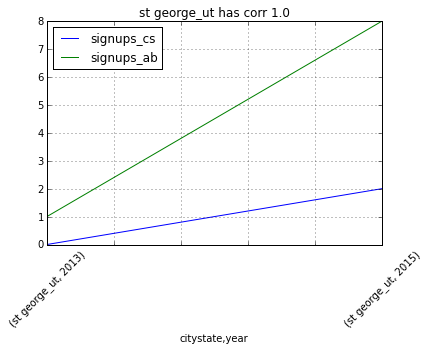

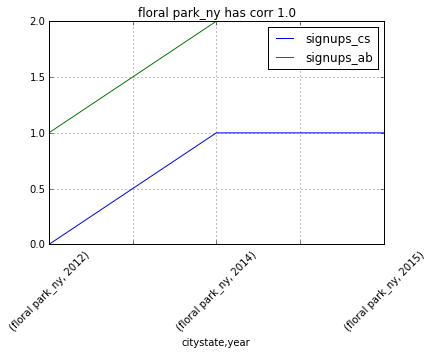

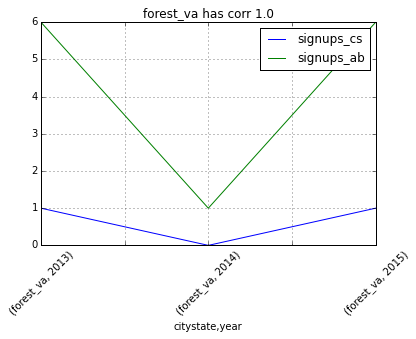

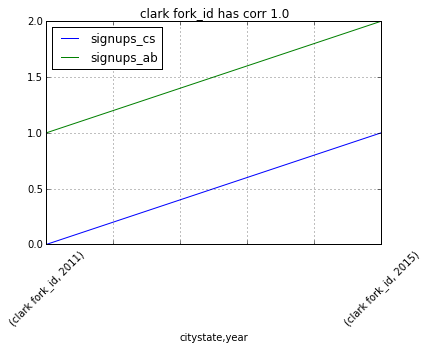

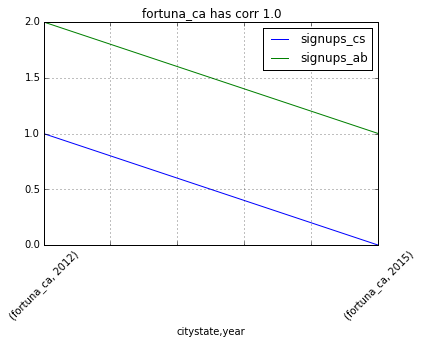

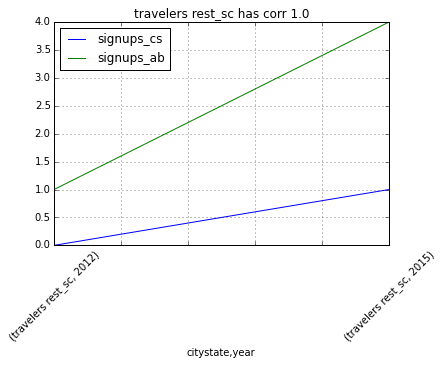

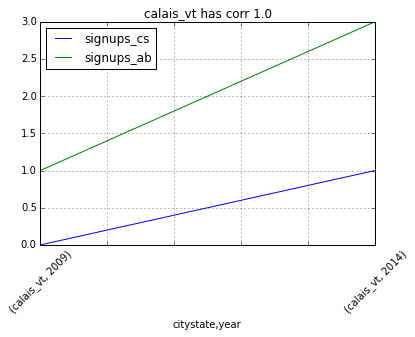

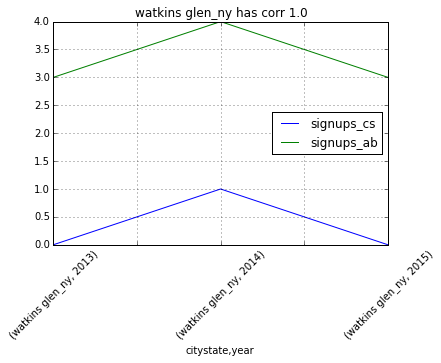

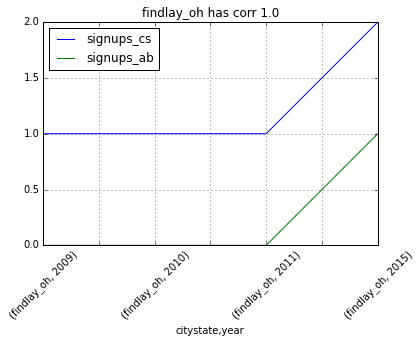

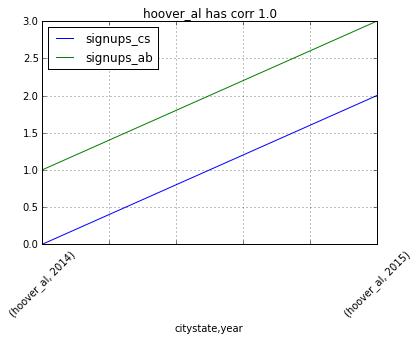

In [215]:
big_cities_groups_refver = big_cities_refver.stack().groupby(level=0)

big_cities_corr_refver = big_cities_groups_refver.agg(lambda x: x.corr().iloc[1,0])

#this is not dangerous just because agg returned weird
del big_cities_corr_refver['signups_ab']
big_cities_corr_refver.columns = ['signup_abcs_correlation']

big_cities_corr_refver.sort(columns='signup_abcs_correlation')

big_cities_corr_refver.dropna(inplace=True)
big_cities_extremes = big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[0:10,]
big_cities_bottom= big_cities_corr_refver.sort(columns='signup_abcs_correlation').iloc[-10:,]

print('# Top and Bottom 10 Cities by Host Signup Correlation')

for city, corr in big_cities_bottom.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups_refver:
        if city==dfcity:
            print(df)
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)


In [224]:
cities = big_cities_refver.stack().reset_index()

In [315]:
gcities = ['minneapolis_mn','new york_ny','seattle_wa','san francisco_ca','washington_dc']
gc = cities[cities['citystate'].apply(lambda x: x in gcities)]

In [316]:
gc.head()

,citystate,year,signups_cs,signups_ab
13481,minneapolis_mn,2004,2,0
13482,minneapolis_mn,2005,10,0
13483,minneapolis_mn,2006,30,0
13484,minneapolis_mn,2007,78,0
13485,minneapolis_mn,2008,113,2


In [317]:
df_test = gc.iloc[:50]

In [318]:
%Rpush gc

/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Saving 8.33 x 11.1 in image

  res = super(Function, self).__call__(*new_args, **new_kwargs)


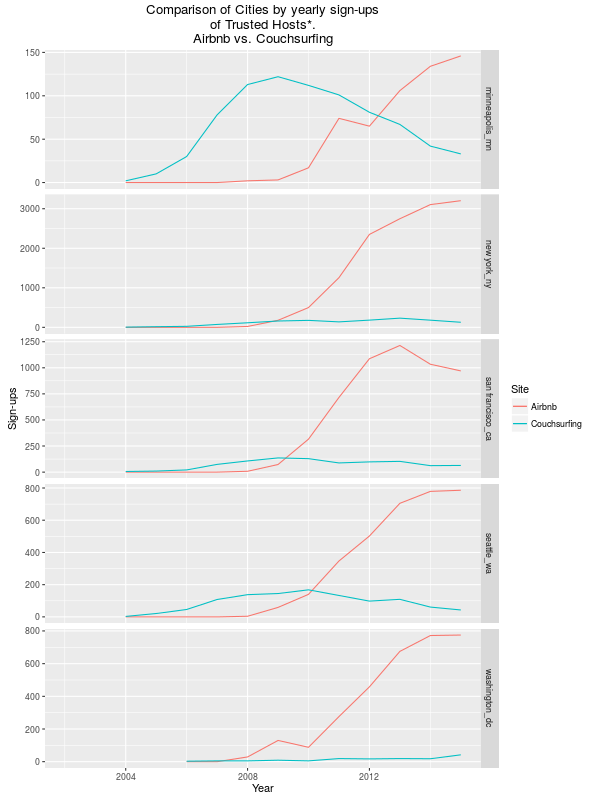

In [319]:
%%R -w 600 -h 800

gp = ggplot(gc, aes(year)) + 
        facet_grid(citystate ~ ., scales = "free") +
        geom_line(aes(y=signups_ab, colour="signups_ab")) + 
        geom_line(aes(y=signups_cs, colour="signups_cs"))+
        xlim(2002,2015)+
        xlab("Year")+
        ylab("Sign-ups")+
        ggtitle("Comparison of Cities by yearly sign-ups\n of Trusted Hosts*. \nAirbnb vs. Couchsurfing")+
        scale_colour_discrete(name="Site",
                         labels=c("Airbnb", "Couchsurfing"))
ggsave('figs/cities_comp.png', dpi=300)
print(gp)

# Load Census Data

In [82]:
census_income = pandas.read_csv('geographic/nhgis0005_csv/nhgis0005_ds206_20145_2014_place.csv',encoding = "ISO-8859-1",usecols=['STATE','PLACE','ABDPE001','GISJOIN'])
census_income.columns = ['gisjoin', 'state', 'place', 'income']

census_pop = pandas.read_csv('geographic/nhgis0006_csv/nhgis0006_ds206_20145_2014_place.csv', encoding = "ISO-8859-1", usecols=['STATE','PLACE','ABA1E001','GISJOIN'])
census_pop.columns = ['gisjoin','state','place','pop']

popinc = pandas.merge(census_income, census_pop[['gisjoin','pop']], left_on='gisjoin', right_on='gisjoin')

In [83]:
popinc.head()

,gisjoin,state,place,income,pop
0,G01000100,Alabama,Abanda CDP,27989,43
1,G01000124,Alabama,Abbeville city,27989,2654
2,G01000460,Alabama,Adamsville city,46005,4472
3,G01000484,Alabama,Addison town,38194,913
4,G01000676,Alabama,Akron town,22813,302


In [84]:
%%capture
popinc['state_abbr'] = popinc['state'].apply(state_lookup)

In [85]:
census_abcs_map = {'Athens-Clarke County unified government (balance)': 'athens',
               'Augusta-Richmond County consolidated government (balance)':'augusta',
               'Boise City city':'boise',
               'East Honolulu CDP':'honolulu',
               'Indianapolis city (balance)':'indianapolis',
               'Lexington-Fayette urban county':'lexington',
               'Louisville/Jefferson County metro government (balance)':'louisville',
               'Nashville-Davidson metropolitan government (balance)':'nashville',
               'St. Augustine city': 'saint augustine',
               'St. Louis city':'saint louis',
               'St. Paul city':'saint paul',
               'St. Petersburg city':'saint petersburg',
               'San Buenaventura (Ventura) city':'ventura',
               'Kailua CDP (Hawaii County)':'kailua-kona',
                'South Lake Tahoe city':'south lake tahoe',
                'Kailua CDP (Honolulu County)':'kailua',
                  'El Paso de Robles (Paso Robles) city':'paso robles',
                  'St. Louis city': 'st. louis',
                  'Yosemite Lakes CDP':'yosemite national park',
                  'Barnstable Town city':'barnstable',
                  'Carmel Valley Village CDP':'carmel',
                  'Sunnyside-Tahoe City CDP':'tahoe city'}

missing_data = {'brooklyn_ny':{'pop':2504700,'income':46085},
               'queens_ny':{'pop':2230722,'income':57001},
               'venice_ca':{'pop':40605,'income':67909},
                'bronx_ny':{'pop':1385108,'income':34388},
                'astoria_ny':{'pop':154000,'income':57001},
                'staten island_ny':{'pop':468730,'income':72569},
                'weehawken_nj':{'pop':634266,'income':58442},
                'long island city_ny':{'pop':68117,'income':57001},
                'olympic valley_ca':{'pop':348432,'income':72725},
                'la jolla_ca':{'pop':42017,'income':72962},
               'wellfleet_ma':{'pop':2750,'income':43558},
                'killington_vt':{'pop':811,'income':47500},
               'saint louis_mo':{'pop':319294,'income':29156},
                'north hollywood_ca':{'pop':77848,'income':42791},
                'north bergen_nj':{'pop':60773,'income':29626},
                'princeton_nj':{'pop':28572,'income':107071},
                'eastsound_wa':{'pop':15769,'income':43491},
                'waimea_hi':{'pop':9212 , 'income':51150 },
                'santa rosa beach_fl':{'pop':55043 , 'income':32407 },
                'eastham_ma':{'pop':4956 , 'income':42618 },
                'watertown_ma':{'pop':31915, 'income':59764 },
                'amherst_ma':{'pop': 37819, 'income':40017 }
               }

def norm_place(s):
    try:
        return census_abcs_map[s]
    except KeyError:
        end = s.split(" ")[-1]
        if end in ['city','CDP','town','village', 'borough', 'municipality']:
            snorm = ' '.join(s.split(' ')[:-1])
            return snorm.lower()
        else:
            return s

In [86]:
popinc['place_norm'] = popinc['place'].apply(norm_place)

In [87]:
popinc['citystate'] = popinc['place_norm'] + '_' + popinc['state_abbr']

In [88]:
popinc = popinc[['citystate', 'pop','income']]

In [89]:
popinc.head()

,citystate,pop,income
0,abanda_al,43,27989
1,abbeville_al,2654,27989
2,adamsville_al,4472,46005
3,addison_al,913,38194
4,akron_al,302,22813


In [90]:
popinc_clean = popinc.dropna()

In [91]:
len(popinc_clean)

28512

In [92]:
popinc_sorted = popinc_clean.sort(['citystate','income'])

In [93]:
popinc_sorted[popinc_sorted['citystate']=='santa rosa_tx']

,citystate,pop,income
25930,santa rosa_tx,130,16250
25929,santa rosa_tx,2881,20500


In [94]:
popinc_sorted.drop_duplicates(subset='citystate',take_last=False,inplace=True)

In [95]:
popinc_missing = pandas.DataFrame.from_dict(missing_data,orient='index')

In [96]:
popinc_missing['citystate'] = popinc_missing.index

In [97]:
popinc_combined = popinc_sorted.append(popinc_missing, ignore_index=True)

In [98]:
abcs_census_corr = pandas.merge(big_cities_corr_refver,popinc_combined, how='inner', left_index=True, right_on='citystate')

In [99]:
#these are the missing ones
missing = list(big_cities_corr_refver.index - abcs_census_corr['citystate'])

In [100]:
#small_census_df = census_df[['ABDPE001','citystate']]
#small_census_df.columns = ['income','citystate']
#small_census_df.to_csv('census_income.csv')

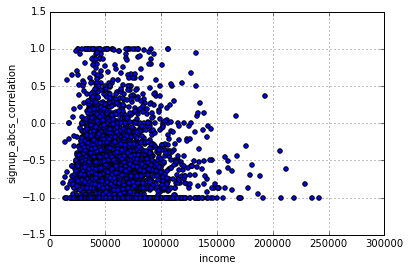

In [101]:
abcs_census_corr.plot(y= 'signup_abcs_correlation', x='income', kind='scatter')

In [102]:
#pandas.stats.ols.OLS(abcs_census['income'], abcs_census['signup_abcs_correlation'])

In [103]:
big_cities_size = big_cities_groups_refver.agg(sum)

In [104]:
abcs_census_size = pandas.merge(big_cities_size,popinc_combined, how='inner', left_index=True, right_on='citystate')

In [105]:
missing_cities = list(set(big_cities_size.index) - set(abcs_census_size['citystate']))

In [106]:
missing_cities_df = big_cities_size.ix[missing_cities].sort('signups_ab', ascending=False)
missing_cities_top = missing_cities_df[:20]
missing_cities_top_size = missing_cities_top.sum().sum()
print(missing_cities_top_size)

947.0


In [107]:
missing_cities_top

,signups_cs,signups_ab
citystate,,
st petersburg_fl,11,57
warren_vt,1,57
carmel valley_ca,1,51
harwich_ma,1,50
narragansett_ri,5,48
flushing_ny,5,47
homewood_ca,1,47
yarmouth_ma,1,44
bushkill_pa,1,43


In [108]:
print('number of hosts in abcs merged dataset')
bcs=big_cities_size.sum().sum()
print(bcs)
print('number of hosts that dont have income data after merging with census')
bccs = abcs_census_size[['signups_cs','signups_ab']].fillna(0).sum().sum()
print(bcs - bccs)
print('as a percent')
print(bccs/bcs)
print('top missing cities contribute')
print(missing_cities_top_size)

number of hosts in abcs merged dataset
248960.0
number of hosts that dont have income data after merging with census
6658.0
as a percent
0.973256748072
top missing cities contribute
947.0


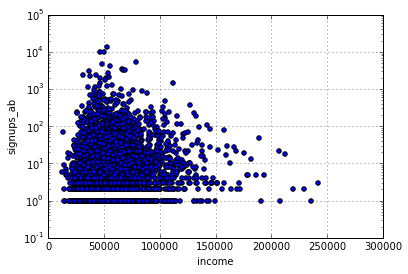

In [109]:
abcs_census_size.plot(x='income', y='signups_ab', kind='scatter')
plt.yscale('log')

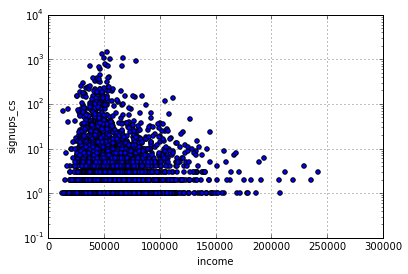

In [110]:
abcs_census_size.plot(x='income', y='signups_cs', kind='scatter')
plt.yscale('log')

In [111]:
abcs_census_size['ratio'] = abcs_census_size['signups_cs'] / abcs_census_size['signups_ab']
abcs_census_size['interaction'] = abcs_census_size['signups_ab'] * abcs_census_size['income']

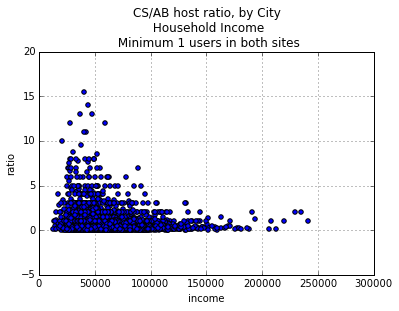

In [112]:
abcs_census_size.plot(x='income', y='ratio', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

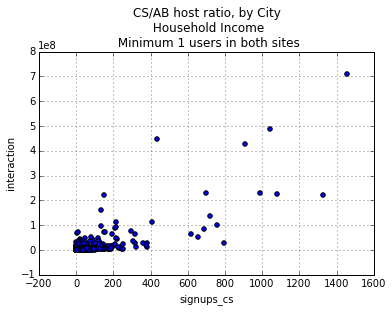

In [113]:
abcs_census_size.plot(x='signups_cs', y='interaction', kind='scatter', title='CS/AB host ratio, by City \n Household Income \n Minimum {} users in both sites'.format(dual_min_refver))

In [114]:
median_income = abcs_census_size['income'].median()

In [115]:
median_income

50666.5

In [116]:
abcs_census_size['high_inc'] = abcs_census_size['income'].apply(lambda x: x > median_income)

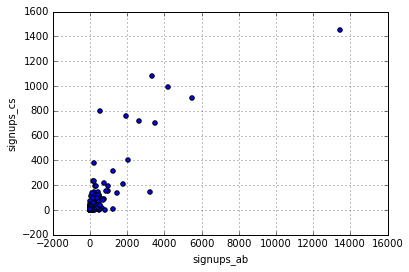

In [117]:
abcs_census_size[abcs_census_size['high_inc']==True].plot(x='signups_ab',y='signups_cs',kind='scatter')

In [118]:
abcs_census_size.head()

,signups_cs,signups_ab,citystate,income,pop,ratio,interaction,high_inc
133,1,2,abbeville_la,28939,12341,0.500000,57878,False
147,3,9,aberdeen_nc,38721,6702,0.333333,348489,False
149,13,1,aberdeen_sd,47540,26979,13.000000,47540,False
150,2,5,aberdeen_wa,39735,16544,0.400000,198675,False
155,14,6,abilene_tx,42766,120776,2.333333,256596,False


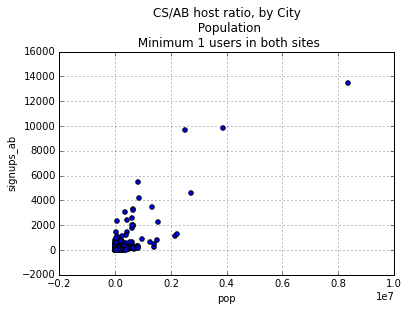

In [119]:
abcs_census_size.plot(x='pop', y='signups_ab', kind='scatter', title='CS/AB host ratio, by City \n Population \n Minimum {} users in both sites'.format(dual_min_refver))

In [120]:
pandas.stats.ols.OLS(abcs_census_size['ratio'], abcs_census_size['income'])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         3884
Number of Degrees of Freedom:   2

R-squared:         0.0143
Adj R-squared:     0.0140

Rmse:              1.1685

F-stat (1, 3882):    56.2525, p-value:     0.0000

Degrees of Freedom: model 1, resid 3882

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0000     0.0000      -7.50     0.0000    -0.0000    -0.0000
     intercept     1.1615     0.0461      25.18     0.0000     1.0711     1.2519
---------------------------------End of Summary---------------------------------

# Mutliple Linear Regression Mixed Effects

In [121]:
popinc_description = popinc_combined.describe()
inc25, inc50, inc75, inc100 = popinc_description.ix['25%']['income'], \
                              popinc_description.ix['50%']['income'], \
                              popinc_description.ix['75%']['income'], \
                              popinc_description.ix['max']['income']
def quartile(inc):
    if inc < inc25:
        return 'a'
    elif inc < inc50:
        return 'b'
    elif inc < inc75:
        return 'c'
    elif inc <= inc100:
        return 'd'

In [181]:
popinc_description

,income,pop
count,28442.000000,28442.000000
mean,50346.508227,8485.692638
std,25261.944075,71600.279898
min,2499.000000,4.000000
25%,34754.250000,367.000000
50%,44442.500000,1153.000000
75%,58488.250000,4277.250000
max,250001.000000,8354889.000000


In [122]:
popinc_combined['quartile'] = popinc_combined['income'].apply(lambda x: quartile(x))

In [123]:
abcs_citystate_refver_flat = abcs_citystate_refver.reset_index()

In [124]:
abcs_citystate_refver_flat = abcs_citystate_refver_flat[(abcs_citystate_refver_flat['year']>=2008) & (abcs_citystate_refver_flat['year']<=2015)]

In [125]:
abcs_popinc = pandas.merge(abcs_citystate_refver_flat, popinc_combined, how='inner', left_on='citystate', right_on='citystate')

In [126]:
abcs_popinc.head()

,citystate,year,signups_cs,signups_ab,income,pop,quartile
0,abbeville_la,2009,1,0,28939,12341,a
1,abbeville_la,2012,0,1,28939,12341,a
2,abbeville_la,2013,0,1,28939,12341,a
3,abbeville_sc,2015,1,0,19869,5207,a
4,aberdeen_md,2012,1,0,50327,15137,c


In [127]:
abcs_popinc.to_csv('cleaned csv/abcs_popinc.csv')

In [261]:
citystate_inc = abcs_popinc[['citystate','signups_cs','signups_ab','pop', 'quartile','income']].groupby(by='citystate').agg({'signups_cs':sum,'signups_ab':sum, 'pop':min,'quartile':min,'income':min})

In [262]:
citystate_inc['cs_thou'] = (citystate_inc['signups_cs'] / citystate_inc['pop'] ) *1000
citystate_inc['ab_thou'] = (citystate_inc['signups_ab'] / citystate_inc['pop']) *1000

In [276]:
citystate_inc['csab_ratio'] = citystate_inc['signups_cs'] / citystate_inc['signups_ab']
citystate_inc['abcs_ratio'] = citystate_inc['signups_ab'] / citystate_inc['signups_cs']

In [283]:
citystate_inc['pop'].max()

8354889

In [278]:
%Rpush abcs_popinc
%Rpush citystate_inc

In [320]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(effects)
library(sjPlot)
library(sjmisc)
library(plm)
library(stargazer)

/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning: 
Please cite as: 


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning:  Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python3.4/dist-packages/rpy2/robjects/functions.py:106: UserWarning:  R package version 5.2. http://CRAN.R-project.org/package=stargazer 


  res = super(Function, self).__call__(*new_args, **new_kwargs)


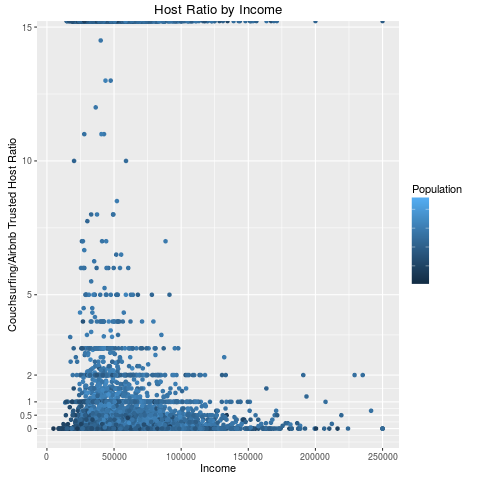

In [307]:
%%R

rp = ggplot(citystate_inc, aes(x=income, y=csab_ratio, colour=pop)) + 
geom_point()+
scale_colour_continuous(trans="log")+
ylab("Couchsurfing/Airbnb Trusted Host Ratio")+
scale_y_continuous(breaks = c(0,0.5,1,2,5,10,15), labels = c(0,0.5,1,2,5,10,15)) +
xlab("Income")+
guides(colour=guide_colorbar(label=FALSE, title="Population"))+
ggtitle("Host Ratio by Income")
ggsave("figs/host_ratio.png",dpi=300)
print(rp)

In [321]:
%%R
crowd.fe = plm(signups_cs ~ signups_ab, index=c("citystate","year"), data=abcs_popinc, model="within")
print(summary(crowd.fe))
print(stargazer(crowd.fe, title="Regression Results", align=TRUE))

Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab, data = abcs_popinc, model = "within", 
    index = c("citystate", "year"))

Unbalanced Panel: n=8841, T=1-8, N=25873

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-85.700  -0.333   0.000   0.252  92.000 

Coefficients :
              Estimate  Std. Error t-value  Pr(>|t|)    
signups_ab -0.02224096  0.00044848 -49.592 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    160110
Residual Sum of Squares: 139900
R-Squared:      0.12618
Adj. R-Squared: 0.083061
F-statistic: 2459.36 on 1 and 17031 DF, p-value: < 2.22e-16

% Table created by stargazer v.5.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Thu, May 12, 2016 - 01:22:20 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} } 
\\[-1.8ex]

In [250]:
%%R
coef(crowd.fe)

 signups_ab 
-0.02224096 


In [167]:
%R head(abcs_popinc[abcs_popinc["quartile"]=="b",])

,citystate,year,signups_cs,signups_ab,income,pop,quartile
5,aberdeen_nc,2008,1,0,38721,6702,b
6,aberdeen_nc,2011,1,1,38721,6702,b
7,aberdeen_nc,2012,0,1,38721,6702,b
8,aberdeen_nc,2013,0,2,38721,6702,b
9,aberdeen_nc,2014,0,2,38721,6702,b
10,aberdeen_nc,2015,0,3,38721,6702,b


In [169]:
%%R
abcs_popinc_a = abcs_popinc[abcs_popinc["quartile"]=="a",]
abcs_popinc_b = abcs_popinc[abcs_popinc["quartile"]=="b",]
abcs_popinc_c = abcs_popinc[abcs_popinc["quartile"]=="c",]
abcs_popinc_d = abcs_popinc[abcs_popinc["quartile"]=="d",]

crowd_a.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_a, model="within")
crowd_b.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_b, model="within")
crowd_c.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_c, model="within")
crowd_d.fe = plm(signups_cs ~ signups_ab + year, index=c("citystate","year"), data=abcs_popinc_d, model="within")

print(summary(crowd_a.fe))
print(summary(crowd_b.fe))
print(summary(crowd_c.fe))
print(summary(crowd_d.fe))

series quartile is constant and has been removed
series quartile is constant and has been removed
series quartile is constant and has been removed
series quartile is constant and has been removed
Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab + year, data = abcs_popinc_a, 
    model = "within", index = c("citystate", "year"))

Unbalanced Panel: n=1654, T=1-8, N=3903

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-24.200  -0.282   0.000   0.248  19.800 

Coefficients :
             Estimate Std. Error t-value  Pr(>|t|)    
signups_ab -0.0107052  0.0021149 -5.0618 4.492e-07 ***
year2009    0.2309217  0.1986038  1.1627   0.24506    
year2010    0.1238852  0.1957206  0.6330   0.52682    
year2011   -0.3483623  0.1887474 -1.8457   0.06507 .  
year2012   -0.9514085  0.1841013 -5.1679 2.577e-07 ***
year2013   -1.2402862  0.1809699 -6.8536 9.278e-12 ***
year2014   -1.4952808  0.1762520 -8.4838 < 2.2e-16 ***
year2015   -1.5950677  0.1733600 -9.2009 <

In [178]:
%%R
summary(abcs_popinc)

          citystate          year        signups_cs       signups_ab      
 abilene_tx    :    8   Min.   :2008   Min.   :  0.00   Min.   :   0.000  
 akron_oh      :    8   1st Qu.:2011   1st Qu.:  0.00   1st Qu.:   0.000  
 alameda_ca    :    8   Median :2013   Median :  0.00   Median :   1.000  
 albany_ny     :    8   Mean   :2012   Mean   :  1.74   Mean   :   7.924  
 albuquerque_nm:    8   3rd Qu.:2014   3rd Qu.:  1.00   3rd Qu.:   3.000  
 alexandria_va :    8   Max.   :2015   Max.   :232.00   Max.   :3203.000  
 (Other)       :25825                                                     
     income            pop          quartile
 Min.   :  4861   Min.   :      9   a:3903  
 1st Qu.: 39378   1st Qu.:   2252   b:5971  
 Median : 50000   Median :   9636   c:6971  
 Mean   : 56197   Mean   :  44934   d:9028  
 3rd Qu.: 66635   3rd Qu.:  35070           
 Max.   :250001   Max.   :8354889           
                                            


In [182]:
%%R
abcs_popinc_lo = abcs_popinc[abcs_popinc["income"] <44442,]
abcs_popinc_hi = abcs_popinc[abcs_popinc["income"] >=44442,]

crowd_lo.fe = plm(signups_cs ~ signups_ab , index=c("citystate","year"), data=abcs_popinc_lo, model="within")
crowd_hi.fe = plm(signups_cs ~ signups_ab , index=c("citystate","year"), data=abcs_popinc_hi, model="within")

print(summary(crowd_lo.fe))
print(summary(crowd_hi.fe))


Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab, data = abcs_popinc_lo, 
    model = "within", index = c("citystate", "year"))

Unbalanced Panel: n=3778, T=1-8, N=9874

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-29.400  -0.304   0.000   0.194  20.600 

Coefficients :
             Estimate Std. Error t-value  Pr(>|t|)    
signups_ab -0.0307890  0.0010966 -28.077 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    29936
Residual Sum of Squares: 26508
R-Squared:      0.11453
Adj. R-Squared: 0.070695
F-statistic: 788.323 on 1 and 6095 DF, p-value: < 2.22e-16
Oneway (individual) effect Within Model

Call:
plm(formula = signups_cs ~ signups_ab, data = abcs_popinc_hi, 
    model = "within", index = c("citystate", "year"))

Unbalanced Panel: n=5063, T=1-8, N=15999

Residuals :
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-84.300  -0.344   0.000   0.294  91.100 

Coefficients :
              Estim

In [ ]:
%%R

crowd.model = lmer(signups_cs ~ signups_ab + (1|citystate), data=abcs_popinc)
print(summary(crowd.model))

In [ ]:
%%R


#thoughts, pop a random effect? can it be if it's continuous
#compare signs per pop instead?
#try interactions signs*pop, signs*income
#try randome slopes too 1+ab|citystat 1+ab|year
#consider rescaling
crowd.model = lmer(signups_cs ~ signups_ab + year + citystate + pop, data=abcs_popinc, REML=FALSE)
print(summary(crowd.model))


plot(Effect('signups_ab', crowd.model))

In [ ]:
%%R

crowd_quartile_i.model = lmer(signups_cs ~  quartile*signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)
crowd_income_i.model = lmer(signups_cs ~  income*signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)

#crowd_income_pop.model = lmer(signups_cs ~  income*signups_ab*pop  + (1|citystate) + year, data=abcs_popinc, REML=FALSE)


crowd_quartile.model = lmer(signups_cs ~  quartile + signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)
crowd_income.model = lmer(signups_cs ~  income + signups_ab  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)
crowd_income_ab.model = lmer(signups_ab ~  income + signups_cs  + (1|citystate) + year + pop, data=abcs_popinc, REML=FALSE)


print(summary(crowd_quartile_i.model))
print(summary(crowd_income_i.model))

#print(summary(crowd_income_pop.model))
print(summary(crowd_income_ab.model))

print(summary(crowd_quartile.model))
print(summary(crowd_income.model))


In [ ]:
%%R

sjp.lmer(crowd_income.model,type = "fe.pred", vars='signups_ab')
sjp.lmer(crowd_income_ab.model,type = "fe.pred", vars='signups_ab')


In [ ]:
%%R
sjp.lmer(crowd_income.model, type ='eff')

# Cities to check for overlap
highest and lowest correlations, ratios, and income for harman and zhiyi

In [ ]:
corr_sorted = big_cities_corr_refver.sort('signup_abcs_correlation')
least_corr, most_corr = corr_sorted[:10], corr_sorted[-10:]
print(least_corr)
print(most_corr)

In [ ]:
sorted_ratio = abcs_census_size.sort('ratio')
least_ratio, most_ratio = sorted_ratio[:10], sorted_ratio[-10:]
print(least_ratio)
print(most_ratio)

In [ ]:
sorted_income = abcs_census_size.sort('income')
least_income, most_income = sorted_income[:10], sorted_income[-10:]
print(least_income)
print(most_income)

# mulitlisters, multicities

In [ ]:
ab_df.head()

In [ ]:
host_num_cities = ab_df[['host_id','smart_location']].groupby(by='host_id').agg({'host_id':len,
                                                                                 'smart_location':lambda x: len(set(x))})

In [ ]:
host_num_cities

In [ ]:
multi_city_hosts = host_num_cities[host_num_cities['smart_location'] > 1]

In [ ]:
multi_city_hosts.plot(kind='hist')
plt.yscale('log')

In [ ]:
multi_city_hosts.sort('smart_location',ascending=False).head()

In [ ]:
multilisters = host_num_cities[host_num_cities['host_id'] > 2]

In [ ]:
len(multilisters)/len(host_num_cities)

In [ ]:
len(multi_city_hosts)/len(multilisters)

# 58% of multilisters have listings in more than 1 city too

In [ ]:
ab_df